<a href="https://colab.research.google.com/github/kirankumar2222/KaiburrTask6/blob/main/Kaiburr_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder  #normalize labels or transform numerical labels
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#library used for working with datasets.

In [16]:
data_s = pd.read_csv('/content/drive/MyDrive/Consumer_Complaints.csv')
data_s.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [18]:
data_s['Product'].nunique() #will count how many unique pairs are there
print('total datas rows and column',data_s.shape)

total datas rows and column (903983, 18)


In [19]:
df = data_s[['Consumer complaint narrative','Product']]
print('total datas',df.shape)

total datas (903983, 2)


In [20]:
#Before preprocessing nulls
print('dropping nulls')
display('Null', df.isna().sum())
print('Total Rows', len(df))
df.dropna(inplace=True)
print('='*80)
#After the dropping the nulls
print('After dropping')
display('count', df.isna().sum())
print('Total Rows', len(df))

dropping nulls


'Null'

Consumer complaint narrative    704013
Product                              0
dtype: int64

Total Rows 903983
After dropping


<ipython-input-20-a325e7a18435>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


'count'

Consumer complaint narrative    0
Product                         0
dtype: int64

Total Rows 199970


In [21]:
df=df.head(1000).reset_index(drop=True)
display(df.head())
display(df.tail())

,Consumer complaint narrative,Product
0,I have outdated information on my credit repor...,Credit reporting
1,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
2,An account on my credit report has a mistaken ...,Credit reporting
3,This company refuses to provide me verificatio...,Debt collection
4,This complaint is in regards to Square Two Fin...,Debt collection


,Consumer complaint narrative,Product
995,On or around XX/XX/XXXX I was first contacted ...,Debt collection
996,I am one of the many borrowers that has my loa...,Student loan
997,I refinanced i year ago and the lender failed ...,Mortgage
998,"XXXX account # XXXX I have insurance, I paid m...",Credit reporting
999,I have XXXX hard inquiries from Safe Rent ( XX...,Mortgage


In [22]:
df['Product'].nunique

<bound method IndexOpsMixin.nunique of 0      Credit reporting
1         Consumer Loan
2      Credit reporting
3       Debt collection
4       Debt collection
             ...       
995     Debt collection
996        Student loan
997            Mortgage
998    Credit reporting
999            Mortgage
Name: Product, Length: 1000, dtype: object>

In [23]:
list(df.Product.unique())

['Credit reporting',
 'Consumer Loan',
 'Debt collection',
 'Mortgage',
 'Credit card',
 'Other financial service',
 'Bank account or service',
 'Student loan',
 'Money transfers',
 'Payday loan',
 'Prepaid card']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
                                            df['Consumer complaint narrative'], df['Product'],
                                            test_size=0.25, random_state=0, stratify=df['Product'])
print(f'Training: {len(X_train)}shape {X_train.shape}')
print(f'Validation: {len(X_test)}shape {X_test.shape}')

Training: 750shape (750,)
Validation: 250shape (250,)


In [26]:
display(y_train.value_counts())

Debt collection            190
Mortgage                   145
Credit reporting           144
Credit card                 93
Bank account or service     70
Consumer Loan               42
Student loan                42
Payday loan                 10
Money transfers              7
Prepaid card                 5
Other financial service      2
Name: Product, dtype: int64

In [27]:
display(y_test.value_counts())

Debt collection            63
Mortgage                   49
Credit reporting           48
Credit card                31
Bank account or service    24
Consumer Loan              14
Student loan               14
Payday loan                 3
Money transfers             2
Prepaid card                2
Name: Product, dtype: int64

In [28]:
vectorizer = TfidfVectorizer(stop_words= 'english')
X_train_vec = vectorizer.fit_transform(X_train) #matrix convertion
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<750x5985 sparse matrix of type '<class 'numpy.float64'>'
 	with 40191 stored elements in Compressed Sparse Row format>,
 <250x5985 sparse matrix of type '<class 'numpy.float64'>'
 	with 12470 stored elements in Compressed Sparse Row format>)

In [29]:
#feature extraction using sklearn models

from sklearn.feature_selection import SelectKBest, chi2

nf = 100

ch2 = SelectKBest(chi2, k=nf)
X_train_sp = ch2.fit_transform(X_train_vec, y_train)
X_test_sp = ch2.transform(X_test_vec)
X_train_sp, X_test_sp

(<750x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 2446 stored elements in Compressed Sparse Row format>,
 <250x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 817 stored elements in Compressed Sparse Row format>)

In [30]:
cols = list(range(nf)) # converting matrix(sparse) to dense to visualize.
X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(750, 100) (250, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
encoder = LabelEncoder()
y_train_num  = encoder.fit_transform(y_train)
y_test_num   = encoder.transform(y_test)
y_train_num.min(), y_train_num.max(), y_test_num.min(), y_test_num.max()

(0, 10, 0, 10)

In [32]:
n=10
print('Text   Encoding')
print('-'*50)
for p,q in zip(y_train[:n].values,y_train_num):
    print(f'{q}      {p}')

Text   Encoding
--------------------------------------------------
0      Bank account or service
6      Mortgage
6      Mortgage
4      Debt collection
4      Debt collection
0      Bank account or service
6      Mortgage
4      Debt collection
1      Consumer Loan
2      Credit card


In [33]:
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'Bank account or service': 0,
 'Consumer Loan': 1,
 'Credit card': 2,
 'Credit reporting': 3,
 'Debt collection': 4,
 'Money transfers': 5,
 'Mortgage': 6,
 'Other financial service': 7,
 'Payday loan': 8,
 'Prepaid card': 9,
 'Student loan': 10}

In [34]:
#Now Modelling the data using random forest classifier


rf  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores = cross_val_score(rf,
                         X_train_dense,
                         y_train_num,
                         cv=5,
                         n_jobs = -1,
                         scoring = 'accuracy')
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.6973333333333332

In [36]:
rf.fit(X_train_dense, y_train_num)
pred=rf.predict(X_test_dense)
print('Ready for Presictions!!!')

Ready for Presictions!!!


In [37]:
pred[0]

2

In [38]:
pred = encoder.inverse_transform(pred)
pred[0]

'Credit card'

In [39]:
output = pd.DataFrame(columns=['complaint','Product','Prediction'])
output['complaint'] = X_test
output['Product'] = y_test
output['Prediction'] = pred
output

,complaint,Product,Prediction
193,I have been with USAA for more than 10 years a...,Credit card,Credit card
720,paid off debt for XXXX sent me to collection f...,Debt collection,Debt collection
462,I made an online payment to Citi Bank on the C...,Credit card,Bank account or service
600,I would like help from the CFPB to have Suntru...,Mortgage,Mortgage
932,XX/XX/2017 XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...,Debt collection,Debt collection
...,...,...,...
724,I opened a Citigold checking account with Citi...,Bank account or service,Mortgage
244,We lived in apartments in 2013. I was 7 months...,Debt collection,Debt collection
138,I am filing this complaint because Equifax has...,Credit reporting,Credit reporting
856,I used to live in Campus Habitat Apartments fo...,Debt collection,Debt collection


In [45]:
#Model Accuracy
output['TF'] = (output['Product'] == output['Prediction']).astype('int')
display(output)
print(f'Accuracy: { 100 * output.TF.sum()/output.TF.count()} %')

,complaint,Product,Prediction,True/false,TF
193,I have been with USAA for more than 10 years a...,Credit card,Credit card,1,1
720,paid off debt for XXXX sent me to collection f...,Debt collection,Debt collection,1,1
462,I made an online payment to Citi Bank on the C...,Credit card,Bank account or service,0,0
600,I would like help from the CFPB to have Suntru...,Mortgage,Mortgage,1,1
932,XX/XX/2017 XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...,Debt collection,Debt collection,1,1
...,...,...,...,...,...
724,I opened a Citigold checking account with Citi...,Bank account or service,Mortgage,0,0
244,We lived in apartments in 2013. I was 7 months...,Debt collection,Debt collection,1,1
138,I am filing this complaint because Equifax has...,Credit reporting,Credit reporting,1,1
856,I used to live in Campus Habitat Apartments fo...,Debt collection,Debt collection,1,1


Accuracy: 74.8 %


In [62]:
#To visualize we'll be defining the confusion_matrix

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,labels,size=8, rotate_labels=False):

    import seaborn as sns
    import matplotlib.pyplot as plt
    font_specs = {"size": 20, 'fontweight':'bold'}
    title_specs= {"size": 16, 'fontweight':'bold'}
    figsize = size
    fig, ax = plt.subplots(figsize = (figsize,figsize), facecolor = '#ebebeb', frameon = True, edgecolor = 'black')
    ax = sns.heatmap(cm,annot=True, cbar = False, cmap = 'Purples',linewidths=5,
                  linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    plt.xlabel('Predicted', fontdict = font_specs, labelpad=-(figsize*65))
    plt.ylabel('Actual', fontdict = font_specs, labelpad=15)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    if rotate_labels:
        ax.set_xticklabels(labels, rotation=90, ha='center')
        ax.set_yticklabels(labels, rotation=0, ha='right')

    ax.tick_params(labelbottom=False, labeltop=True, labelsize = 12, colors ='#a83297' )
    plt.title('CONFUSION MATRIX',loc = 'right', pad = figsize*4 , fontdict = title_specs)
    plt.show()
print('Defined!!!!')

Defined!!!!


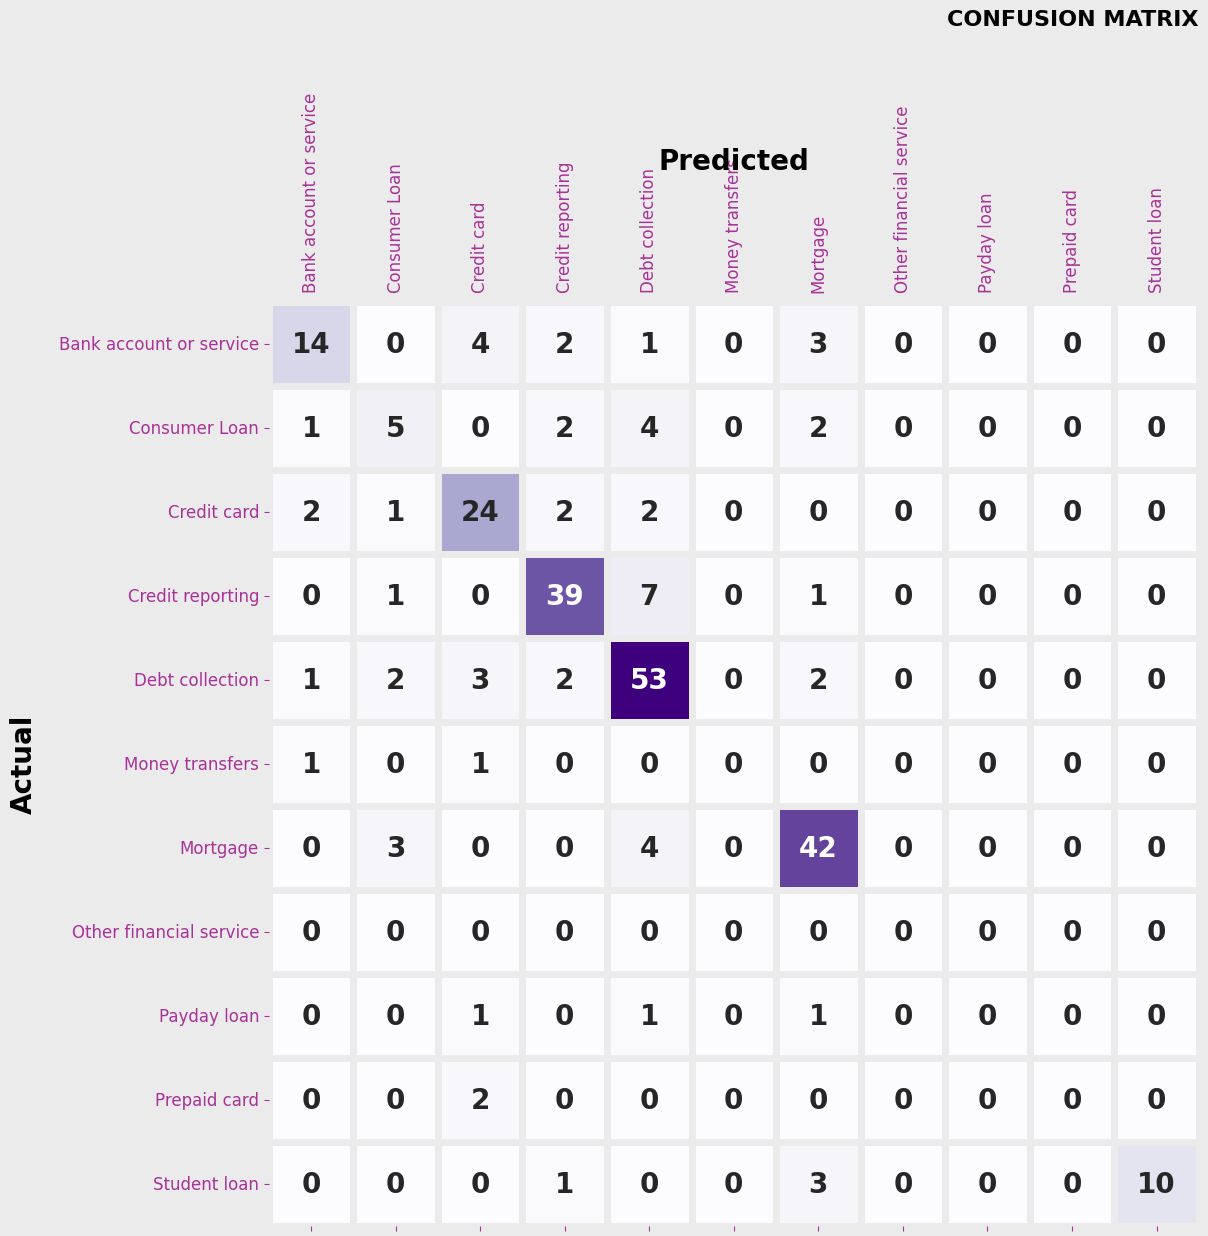

In [63]:
cm = confusion_matrix(y_test, pred, labels=encoder.classes_)
plot_confusion_matrix(cm=cm,labels=encoder.classes_, size=12, rotate_labels=True)